In [1]:
__author__ = "@Tssp"
__date__   = "24/01/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix2497_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1dq2d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_152rm8g2l34m24_102CM8g1L34M24_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix2497iy4993iz50_ix2497iy50iz50/Ag_B1u_vsLiLi1d2d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70316', '.70557', '.70559', '.70561', '.70563', '.70567', '.70569', '.70571', '.70573', '.70577', '.70579', '.70581', '.70583', '.70587', '.70589', '.70591', '.70593', '.70597', '.70599', '.70601', '.70603', '.70607', '.70609', '.70611', '.70613', '.70617', '.70619', '.70621', '.70623', '.70628', '.70629', '.70631', '.70632', '.70633', '.70634', '.70636', '.70637', '.70638', '.70639', '.70641', '.70642', '.70643', '.70644', '.70646', '.70647', '.70648', '.70649', '.70651', '.70652', '.70653', '.70654', '.70656', '.70657', '.70658', '.70659', '.70661', '.70662', '.70663', '.70664', '.70666', '.70667', '.70668', '.70669', '.70671', '.70672', '.70673', '.70674', '.707666', '.707891', '.7083468', '.708483', '.708822', '.709003

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
least_bound_pos = 2050

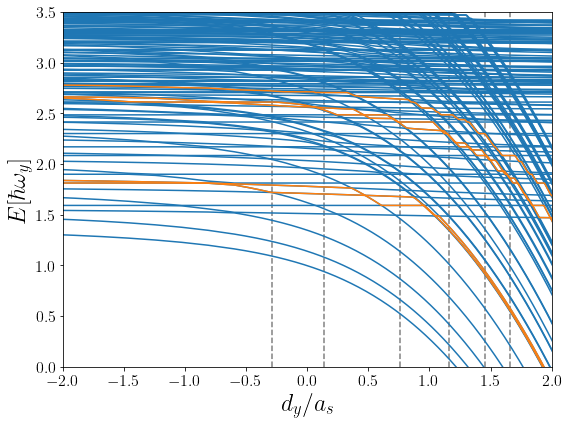

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 150):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_2056']/wy, 'C1')
ax.plot(x, dic['nivel_2057']/wy, 'C1')
ax.plot(x, dic['nivel_2079']/wy, 'C1')
ax.plot(x, dic['nivel_2080']/wy, 'C1')
ax.plot(x, dic['nivel_2088']/wy, 'C1')
ax.set_ylim(0, 3.5)
ax.set_xlim(-2, 2)
ax.vlines(x[311], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[270], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[210], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[170], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[140], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[120], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix2497_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

## Resonance x<1

In [10]:
%matplotlib inline

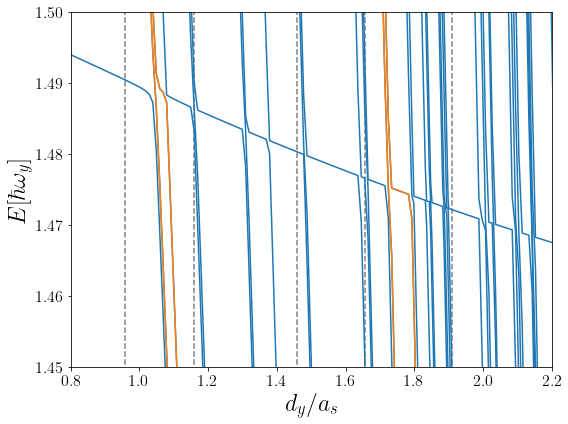

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
    
ax.plot(x, dic['nivel_2056']/wy, 'C1')
ax.plot(x, dic['nivel_2057']/wy, 'C1')
ax.plot(x, dic['nivel_2069']/wy, 'C1')
ax.plot(x, dic['nivel_2070']/wy, 'C1')
ax.vlines(x[190], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[170], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[140], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[120], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[70], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_ylim(1.45, 1.5)
ax.set_xlim(0.8, 2.2)
ax.plot(0.59284, 2.60851, 'w*', markersize=16, markeredgecolor='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix7802_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

In [15]:
print('''Eigenstates:
2052: (0,0,2)
2053: (0,0,4)
2054: (0,0,6)
2055: (0,0,8)
2056: (2,0,0) ICIR
2057: (0,2,0) ICIR
.
.
.
2069: (4,0,0) ICIR
2070: (0,4,0) ICIR
2073: (2,2,0) ICIR
''')

Eigenstates:
2052: (0,0,2)
2053: (0,0,4)
2054: (0,0,6)
2055: (0,0,8)
2056: (2,0,0) ICIR
2057: (0,2,0) ICIR
.
.
.
2069: (4,0,0) ICIR
2070: (0,4,0) ICIR
2073: (2,2,0) ICIR



In [12]:
print(f'''To find the eigenstates:
x={x[190]}, delta=0{delta[190]}
x={x[170]}, delta=0{delta[170]}
x={x[140]}, delta=0{delta[140]}
x={x[120]}, delta=0{delta[120]}
x={x[70]}, delta=0{delta[70]}
''')

To find the eigenstates:
x=0.9584854305111402, delta=0.71050
x=1.1594786048334198, delta=0.70950
x=1.4582894306327991, delta=0.70800
x=1.655740694128729, delta=0.70700
x=1.9103653495490833, delta=0.70570



1.1770792563009466e-14
[0.0, 1.04532532878801, -0.301414539330331 - 41.2516565819461*I, -0.301414539330331 + 41.2516565819461*I]
Write the position of the correct solution: 1
[0.0, 1.04532532878801, -0.301414539330331 - 41.2516565819461*I, -0.301414539330331 + 41.2516565819461*I]
Write the position of the correct solution: 1
[0.0, 1.73155855107247, -0.644531150472557 - 57.2501249075126*I, -0.644531150472557 + 57.2501249075126*I]
Write the position of the correct solution: 1
[0.0, 1.73155855107247, -0.644531150472557 - 57.2501249075126*I, -0.644531150472557 + 57.2501249075126*I]
Write the position of the correct solution: 1
[0.0, 1.83503058755655, -0.696267168714597 - 56.8882233756945*I, -0.696267168714597 + 56.8882233756945*I]
Write the position of the correct solution: 1
[0.0, 1.83503058755655, -0.696267168714597 - 56.8882233756945*I, -0.696267168714597 + 56.8882233756945*I]
Write the position of the correct solution: 1


(0.8, 2.2)

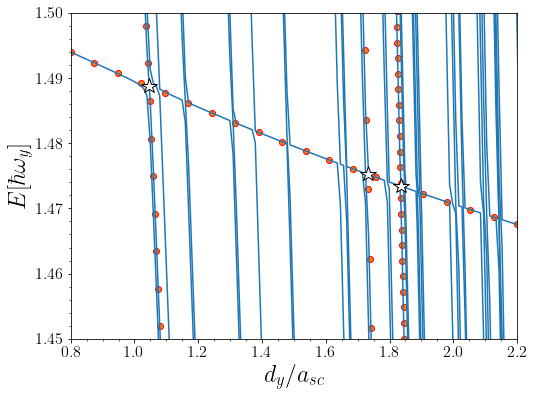

In [19]:
fig3, ax3 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax3.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')

# nivel 2055:
trap_poly = trap_fit(dic, x, x_lims=(0.8, 2.2), y_lims=(1.45, 1.5) ,levels=(2054, 2088), tol=1, wy=wy)/wy
x2055 = np.linspace(0.8, 2.2, num=20)
ax3.scatter(x2055, np.polyval(trap_poly, x2055), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)

# nivel 2056:
f2056 = np.polyfit(x[(x < 1.1) & (x > 1)], np.array(dic['nivel_2056'])[(x < 1.1) & (x > 1)]/wy, deg=1)
x2056 = np.linspace(1, 1.1, num=20)
ax3.scatter(x2056, np.polyval(f2056, x2056), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2069:
f2069 = np.polyfit(x[(x < 1.84) & (x > 1.78)], np.array(dic['nivel_2069'])[(x < 1.84) & (x > 1.78)]/wy, deg=1)
x2069 = np.linspace(1.6, 1.85, num=50)
ax3.scatter(x2069, np.polyval(f2069, x2069), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2073:
f2073 = np.polyfit(x[(x < 1.84) & (x > 1.78)], np.array(dic['nivel_2073'])[(x < 1.84) & (x > 1.78)]/wy, deg=1)
x2073 = np.linspace(1.8, 1.88, num=70)
ax3.scatter(x2073, np.polyval(f2073, x2073), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2056), np.polyval(trap_poly, cross_points(trap_poly, f2056)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2069), np.polyval(trap_poly, cross_points(trap_poly, f2069)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2073), np.polyval(trap_poly, cross_points(trap_poly, f2073)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.22, 2.635), xytext=(1.20, 2.637), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.17, 2.6305), xytext=(1.20, 2.6305), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.31, 2.6357), xytext=(1.33, 2.6357), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(1.45, 1.5)
ax3.set_xlim(0.8, 2.2)
#fig3.savefig('Results/Figures/LiLi_1d2d_2497_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [20]:
print(f'''Crosses between (x, E):
* trap-(2,0,0)-(0,2,0)): ({cross_points(trap_poly, f2056)}, {np.polyval(trap_poly, cross_points(trap_poly, f2056))})
* trap-(4,0,0)-(0,4,0): ({cross_points(trap_poly, f2069)}, {np.polyval(trap_poly, cross_points(trap_poly, f2069))})
* trap-(2,2,0): ({cross_points(trap_poly, f2073)}, {np.polyval(trap_poly, cross_points(trap_poly, f2073))})
''')

[0.0, 1.04532532878801, -0.301414539330331 - 41.2516565819461*I, -0.301414539330331 + 41.2516565819461*I]
Write the position of the correct solution: 1
[0.0, 1.04532532878801, -0.301414539330331 - 41.2516565819461*I, -0.301414539330331 + 41.2516565819461*I]
Write the position of the correct solution: 1
[0.0, 1.73155855107247, -0.644531150472557 - 57.2501249075126*I, -0.644531150472557 + 57.2501249075126*I]
Write the position of the correct solution: 1
[0.0, 1.73155855107247, -0.644531150472557 - 57.2501249075126*I, -0.644531150472557 + 57.2501249075126*I]
Write the position of the correct solution: 1
[0.0, 1.83503058755655, -0.696267168714597 - 56.8882233756945*I, -0.696267168714597 + 56.8882233756945*I]
Write the position of the correct solution: 1
[0.0, 1.83503058755655, -0.696267168714597 - 56.8882233756945*I, -0.696267168714597 + 56.8882233756945*I]
Write the position of the correct solution: 1
Crosses between (x, E):
* trap-(2,0,0)-(0,2,0)): (1.04532532878801, 1.48869520121986)
* 

In [22]:
print(f'''Crosses between (x, E):
* trap-(2,0,0)-(0,2,0)): ({1/cross_points(trap_poly, f2056)})
* trap-(4,0,0-(0,4,0): ({1/cross_points(trap_poly, f2069)})
* trap-(2,2,0): ({1/cross_points(trap_poly, f2073)})
''')

[0.0, 1.04532532878801, -0.301414539330331 - 41.2516565819461*I, -0.301414539330331 + 41.2516565819461*I]
Write the position of the correct solution: 1
[0.0, 1.73155855107247, -0.644531150472557 - 57.2501249075126*I, -0.644531150472557 + 57.2501249075126*I]
Write the position of the correct solution: 1
[0.0, 1.83503058755655, -0.696267168714597 - 56.8882233756945*I, -0.696267168714597 + 56.8882233756945*I]
Write the position of the correct solution: 1
Crosses between (x, E):
* trap-(2,0,0)-(0,2,0)): (0.956639978445212)
* trap-(4,0,0-(0,4,0): (0.577514401335511)
* trap-(2,2,0): (0.544950044310466)

